# Insurance Dataset

 - HealthyLife Insurance company has gathered the data regarding the customers and wants to analyze it. Different customers have different lifestyles and hence not all can have the same medical expenditures or requirement of health insurance. To better tailor the insurance package to be given to different customers, the company now wants to integrate machine learning into the process and identify the right insurance charges for each customer. 

# Import Required Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [5]:
data = pd.read_csv(r"C:\Users\Raksha Chavan\Downloads\Linear Regression Project\Linear Regression Project\Dataset\insurance.csv")
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
data.shape

(1338, 7)

# Data Pre-Processing

In [11]:
data.duplicated().sum()

1

In [15]:
data[data.duplicated(keep = False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [17]:
data.drop_duplicates(inplace = True)

In [19]:
data.shape

(1337, 7)

In [140]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

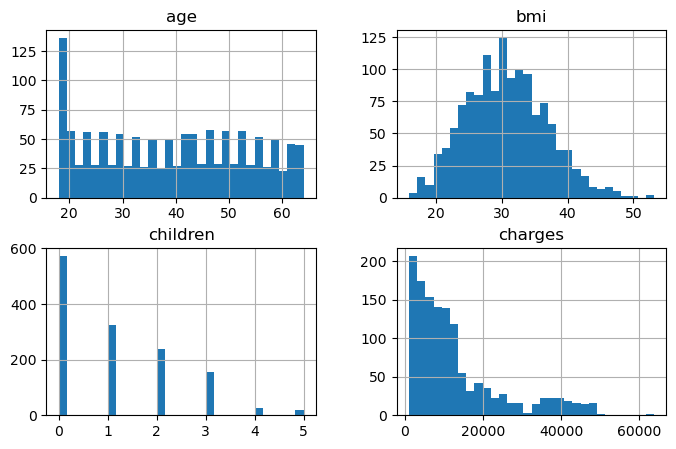

In [25]:
data.hist(bins = 30 , figsize = (8,5))
plt.show()

# Detecting Outliers

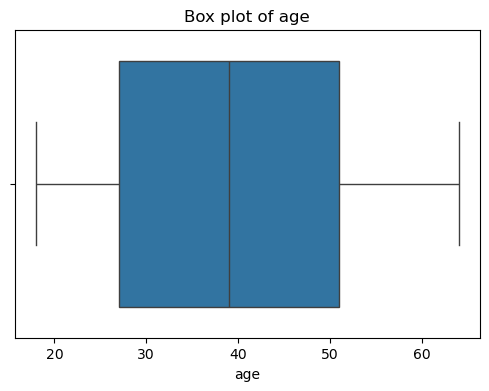

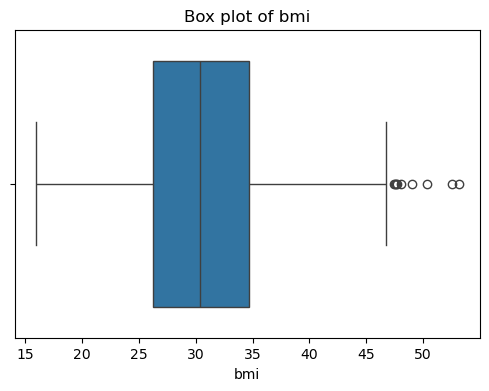

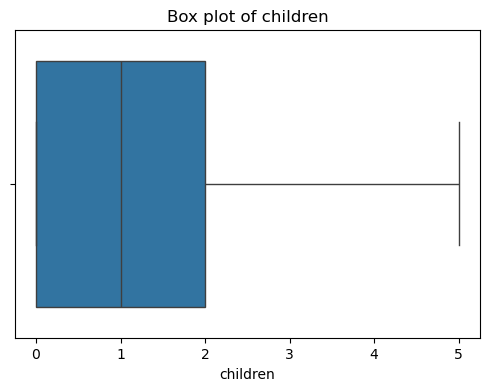

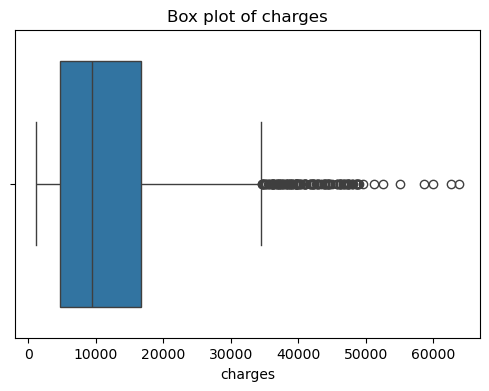

In [65]:
# Visualizing numerical columns in the dataset
numerical_features = ['age', 'bmi', 'children', 'charges']

for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col])
    plt.title(f'Box plot of {col}')
    plt.show()


In [103]:
# Function to detect outliers based on IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Applying the IQR method on numerical features
for col in numerical_features:
    outliers = detect_outliers_iqr(data[col])
    print(f'Outliers in {col}:')
    print(outliers)



Outliers in age:
Series([], Name: age, dtype: int64)
Outliers in bmi:
116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64
Outliers in children:
Series([], Name: children, dtype: int64)
Outliers in charges:
14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1300    62592.87309
1301    46718.16325
1303    37829.72420
1313    36397.57600
1323    43896.37630
Name: charges, Length: 139, dtype: float64


In [105]:
# Remove rows with outliers in any column
from scipy import stats
data_cleaned = np.abs(stats.zscore(data[numerical_features]))
# Define threshold
threshold = 3

# Identify outliers
outlier_mask = (data_cleaned > threshold).any(axis=1)

# Remove outliers
data_cleaned = data[~outlier_mask]

print(f'Shape of original data: {data.shape}')
print(f'Shape after removing outliers: {data_cleaned.shape}')


Shape of original data: (1337, 7)
Shape after removing outliers: (1308, 7)


# Label Encoding for Categorical Columns

In [107]:
from sklearn.preprocessing import LabelEncoder

In [109]:
label_encoder = LabelEncoder()

# Apply label encoding to the 'sex' column
data['sex'] = label_encoder.fit_transform(data['sex'])

# Apply label encoding to the 'smoker' column
data['smoker'] = label_encoder.fit_transform(data['smoker'])

# Apply label encoding to the 'region' column
data['region'] = label_encoder.fit_transform(data['region'])


In [111]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [113]:
X = data.drop(columns='charges')
Y = data['charges']


# Split The Data

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Model building 

In [117]:
from sklearn.linear_model import LinearRegression
OLS = LinearRegression()
OLS.fit(X_train , Y_train)

LinearRegression()

In [119]:
y_pred = OLS.predict(X_test)

In [121]:
print(" the intercept is " +  str(OLS.intercept_))
print(" the coeffiients are " +  str(OLS.coef_))
print(" the R_sqaured value is " +  str(OLS.score(X_train, Y_train)))

 the intercept is -11047.686556720197
 the coeffiients are [  248.76407134   -99.69539417   312.60904469   534.12087654
 23052.15275173  -237.62514748]
 the R_sqaured value is 0.7297182858804965


In [138]:
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')



MSE: 35493102.61165054
RMSE: 5957.608799816462


# End 

# Thank You